In [1]:
#Basic Librarries
import numpy as np
import argparse
import os
from pathlib import Path
import shutil
import random
import sys

In [2]:
#Unzip images to session folder
!unzip -q /content/data.zip -d /content/data

In [3]:
#Argparse is used to handle command-line arguments in python scripts
parser = argparse.ArgumentParser()

In [4]:
parser.add_argument('--datapath', help='Path to data folder containing image and annotation files',
                    required=True)
parser.add_argument('--train_pct', help='Ratio of images to go to train folder; \
                    the rest go to validation folder (example: ".8")',
                    default=.8)

_StoreAction(option_strings=['--train_pct'], dest='train_pct', nargs=None, const=None, default=0.8, type=None, choices=None, required=False, help='Ratio of images to go to train folder;                     the rest go to validation folder (example: ".8")', metavar=None)

###Above code can be written in module and use following command to run it
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

In [5]:
args = parser.parse_args(['--datapath', '/content/data'])

#args = parser.parse_args(['--datapath', '/content/custom_data', '--train_pct', '0.9'])

In [6]:
data_path = args.datapath
train_percent = float(args.train_pct)
val_percent = 1 - train_percent

In [7]:
# Define path to input dataset
input_image_path = os.path.join(data_path,'images')
input_label_path = os.path.join(data_path,'labels')

In [8]:
# Define paths to image and annotation folders
cwd = os.getcwd()
train_img_path = os.path.join(cwd,'data/train/images')
train_txt_path = os.path.join(cwd,'data/train/labels')
val_img_path = os.path.join(cwd,'data/validation/images')
val_txt_path = os.path.join(cwd,'data/validation/labels')

In [9]:
# Create folders if they don't already exist
for dir_path in [train_img_path, train_txt_path, val_img_path, val_txt_path]:
   if not os.path.exists(dir_path):
      os.makedirs(dir_path)
      print(f'Created folder at {dir_path}.')

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.


In [10]:
# Get list of all images and annotation files
img_file_list = [path for path in Path(input_image_path).rglob('*')]
txt_file_list = [path for path in Path(input_label_path).rglob('*')]

In [11]:
print(f'Number of image files: {len(img_file_list)}')
print(f'Number of annotation files: {len(txt_file_list)}')

Number of image files: 162
Number of annotation files: 162


In [12]:
# Determine number of files to move to each folder
file_num = len(img_file_list)
train_num = int(file_num*train_percent)
val_num = file_num - train_num
print('Images moving to train: %d' % train_num)
print('Images moving to validation: %d' % val_num)

Images moving to train: 129
Images moving to validation: 33


In [13]:
# Select files randomly and copy them to train or val folders
for i, set_num in enumerate([train_num, val_num]):
  for ii in range(set_num):
    img_path = random.choice(img_file_list)
    img_fn = img_path.name
    base_fn = img_path.stem
    txt_fn = base_fn + '.txt'
    txt_path = os.path.join(input_label_path,txt_fn)

    if i == 0: # Copy first set of files to train folders
      new_img_path, new_txt_path = train_img_path, train_txt_path
    elif i == 1: # Copy second set of files to the validation folders
      new_img_path, new_txt_path = val_img_path, val_txt_path

    shutil.copy(img_path, os.path.join(new_img_path,img_fn))
    #os.rename(img_path, os.path.join(new_img_path,img_fn))
    if os.path.exists(txt_path): # If txt path does not exist, this is a background image, so skip txt file
      shutil.copy(txt_path,os.path.join(new_txt_path,txt_fn))
      #os.rename(txt_path,os.path.join(new_txt_path,txt_fn))

    img_file_list.remove(img_path)

Ultralytics library is a popular open-source computer vision toolkit developed by the creators of the YOLO (You Only Look Once) object detection models. It's centered around implementing and training advanced deep learning models for object detection, instance segmentation, pose estimation, and more.

In [14]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

Before Training: Need to create the Ultralytics training configuration YAML file. This file specifies the location of train and validation data, and it also defines the model's classes.

Run the code block below to automatically generate a `data.yaml` configuration file. Make sure to have a labelmap file located at `data/classes.txt`.

In [15]:
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 11
names:
- MMs_peanut
- MMs_regular
- airheads
- gummy_worms
- milky_way
- nerds
- skittles
- snickers
- starbust
- three_musketeers
- twizzlers


# Train Model

## Training Parameters
Now that the data is organized and the config file is created, we're ready to start training! First, there are a few important parameters to decide on.

**Model architecture & size (`model`):**

There are several YOLOV8 models sizes available to train, including `yoloV8n.pt`, `yoloV8s.pt`, `yoloV8m.pt`, `yolov8l.pt`, and `yolov8xl.pt`. Larger models run slower but have higher accuracy, while smaller models run faster but have lower accuracy. If we aren't sure which model size to use, `yolov8s.pt` is a good starting point.


**Number of epochs (`epochs`)**

The best amount of epochs to use depends on the size of the dataset and the model architecture. If your dataset has less than 200 images, a good starting point is 60 epochs. If your dataset has more than 200 images, a good starting point is 40 epochs.


**Resolution (`imgsz`)**

Resolution has a large impact on the speed and accuracy of the model: a lower resolution model will have higher speed but less accuracy. YOLO models are typically trained and inferenced at a 640x640 resolution. However, if you want your model to run faster or know you will be working with low-resolution images, try using a lower resolution like 480x480.

## Run Training

Run the following code block to begin training. If you want to use a different model, number of epochs, or resolution, change `model`, `epochs`, or `imgsz`.

In [17]:
!yolo detect train data=/content/data.yaml model=yolov8s.pt epochs=60 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 187MB/s]
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

# Test model
## The model has been trained; now it's time to test it! The commands below run the model on the images in the validation folder and then display the results for the first 10 images. This is a good way to confirm your model is working as expected. Click Play on the blocks below to see how your model performs.

In [18]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs

image 1/33 /content/data/validation/images/0873acf3-candy_40.jpg: 384x640 1 MMs_peanut, 1 airheads, 1 skittles, 1 twizzlers, 40.1ms
image 2/33 /content/data/validation/images/08ed74f3-candy_64.jpg: 384x640 1 airheads, 1 gummy_worms, 3 nerdss, 1 snickers, 1 starbust, 10.8ms
image 3/33 /content/data/validation/images/0b01ef90-candy_26.jpg: 384x640 1 MMs_peanut, 2 airheadss, 1 nerds, 1 starbust, 1 three_musketeers, 10.7ms
image 4/33 /content/data/validation/images/158c744d-candy_123.jpg: 384x640 1 airheads, 10.7ms
image 5/33 /content/data/validation/images/1a0a0a87-candy_138.jpg: 384x640 1 MMs_peanut, 10.7ms
image 6/33 /content/data/validation/images/2e4d966d-candy_99.jpg: 480x640 2 airheadss, 1 starbust, 40.0ms
image 7/33 /content/data/validation/images/33d8a7b4-candy_131.jpg: 384x640 1 gummy_worms, 1 skittles, 11.4ms
image 

In [19]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

## Download YOLO Model

First, zip and download the trained model.

The code creates a folder named `my_model`, moves the model weights into it, and renames them from `best.pt` to `my_model.pt`. It also adds the training results in case you want to reference them later. It then zips the folder as `my_model.zip`.

In [20]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/val_batch0_pred.jpg (deflated 10%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch450.jpg (deflated 12%)
  adding: train/val_batch1_labels.jpg (deflated 6%)
  adding: train/P_curve.png (deflated 9%)
  adding: train/train_batch2.jpg (deflated 3%)
  adding: train/confusion_matrix.png (deflated 21%)
  adding: train/PR_curve.png (deflated 20%)
  adding: train/results.csv (deflated 62%)
  adding: train/train_batch451.jpg (deflated 12%)
  adding: train/F1_curve.png (deflated 7%)
  adding: train/train_batch452.jpg (deflated 10%)
  adding: train/val_batch0_labels.jpg (deflated 11%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/val_batch1_pred.jpg (deflated 6%)
  adding: train/results.png (deflated 7%)
  adding: train/labels.jpg (deflated 30%)
  adding: train/R_curve.png (deflate

In [ ]:
# Downloading model
#from google.colab import files

#files.download('/content/my_model.zip')

In [21]:
#Testing with new sample file
!wget -O /content/data/test.jpg "https://images-cdn.ubuy.co.in/63526eb9c797ce1c1e1f26b4-snickers-m-amp-m-39-s.jpg"

--2025-06-10 01:21:19--  https://images-cdn.ubuy.co.in/63526eb9c797ce1c1e1f26b4-snickers-m-amp-m-39-s.jpg
Resolving images-cdn.ubuy.co.in (images-cdn.ubuy.co.in)... 18.154.132.54, 18.154.132.116, 18.154.132.39, ...
Connecting to images-cdn.ubuy.co.in (images-cdn.ubuy.co.in)|18.154.132.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘/content/data/test.jpg’

/content/data/test.     [ <=>                ] 134.07K  --.-KB/s    in 0.1s    

2025-06-10 01:21:20 (916 KB/s) - ‘/content/data/test.jpg’ saved [137290]



In [22]:
#Predict the labels with Bounding Boxes in the test image
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/test.jpg save=True

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/data/test.jpg: 640x640 3 snickerss, 2 three_musketeerss, 16.3ms
Speed: 3.2ms preprocess, 16.3ms inference, 169.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


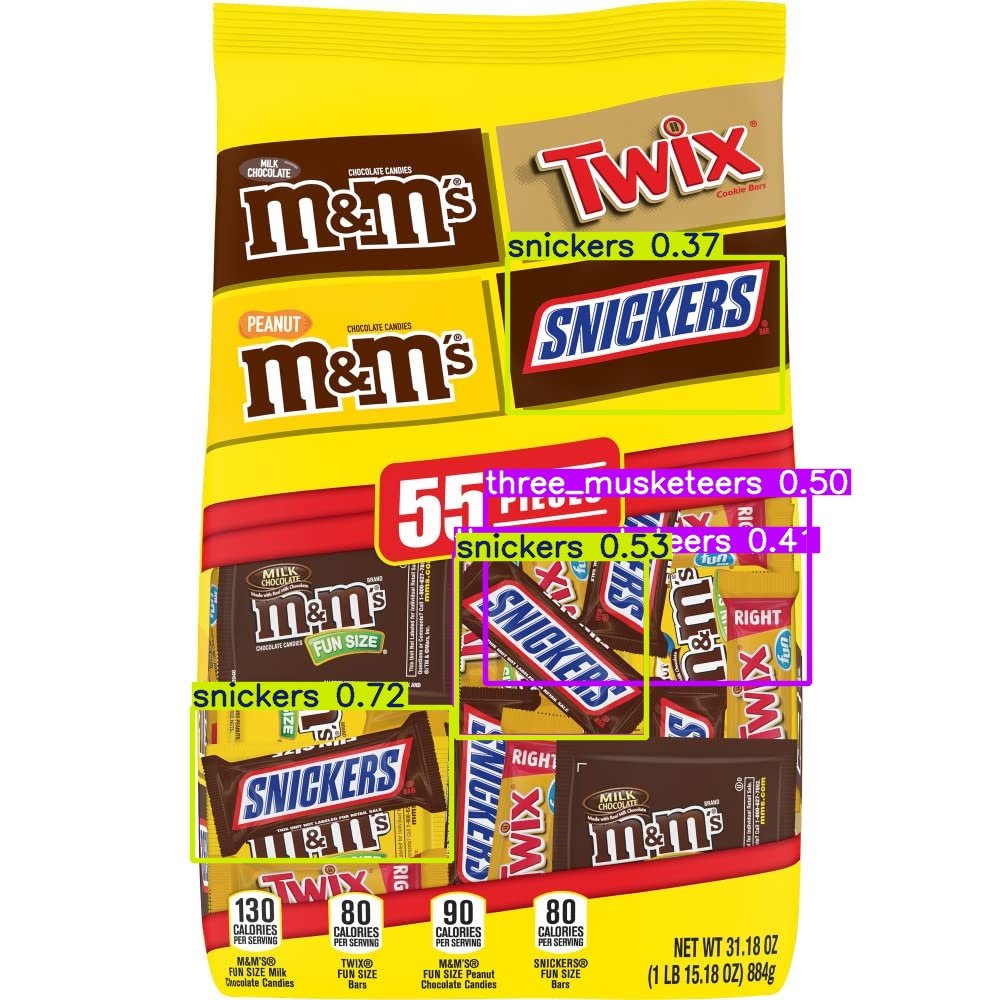

In [23]:
#To display the image with label and bounding boxes
from IPython.display import Image, display
display(Image(filename='/content/runs/detect/predict2/test.jpg', height=400))